In [10]:
import pandas as pd 

# Load the dataset 
data =pd.read_csv('demand.csv')
data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,18/12/16,8054,216341,51.8441,51.84,0,0,0
1,2,25/05/04,8124,217958,13.1031,12.79,0,0,7
2,3,22/03/06,8011,216085,74.2495,71.82,0,0,2
3,4,19/01/13,8082,217610,110.6291,105.60,0,0,0
4,5,18/05/13,8031,216778,52.2367,47.59,0,0,1


In [11]:
# check the missing value 
missing_check =data.isnull().sum() 

# display the missing value count 
missing_check

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [12]:
# convert the week columns to datetime fromat 
data['week'] =pd.to_datetime(data['week'],format='%d/%m/%y') 

# Aggregate the data by week 
week_data =data.groupby('week')['units_sold'].sum().reset_index() 

#Display the first few rows of the aggregated data 
week_data.head() 

,week,units_sold
0,2001-01-17,110
1,2001-01-23,89
2,2001-02-26,101
3,2001-03-20,105
4,2001-03-26,121


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   record_ID        20000 non-null  int64         
 1   week             20000 non-null  datetime64[ns]
 2   store_id         20000 non-null  int64         
 3   sku_id           20000 non-null  int64         
 4   total_price      20000 non-null  float64       
 5   base_price       20000 non-null  float64       
 6   is_featured_sku  20000 non-null  int64         
 7   is_display_sku   20000 non-null  int64         
 8   units_sold       20000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 1.4 MB


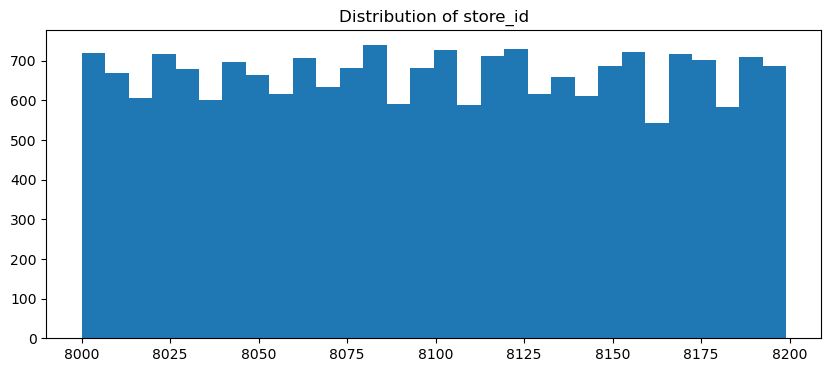

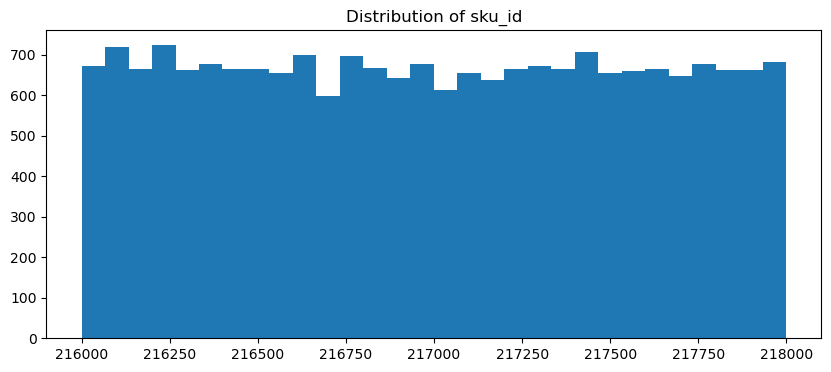

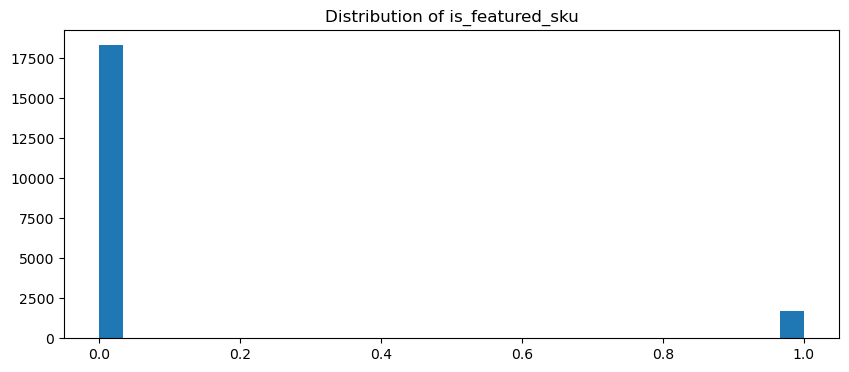

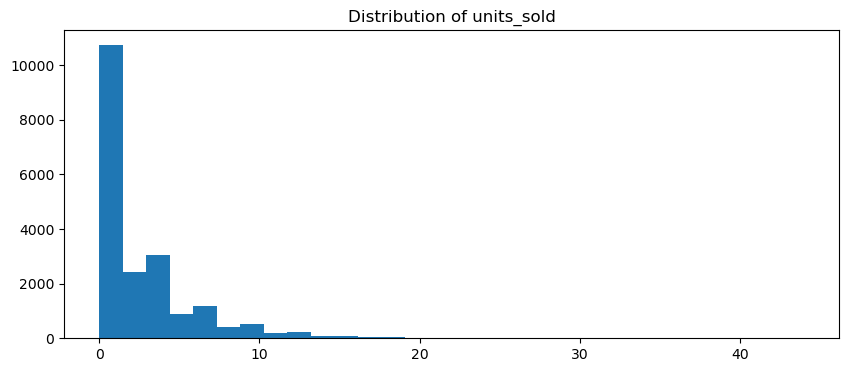

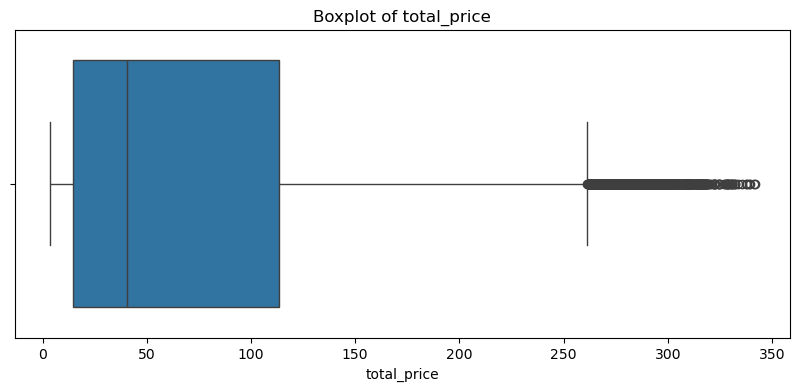

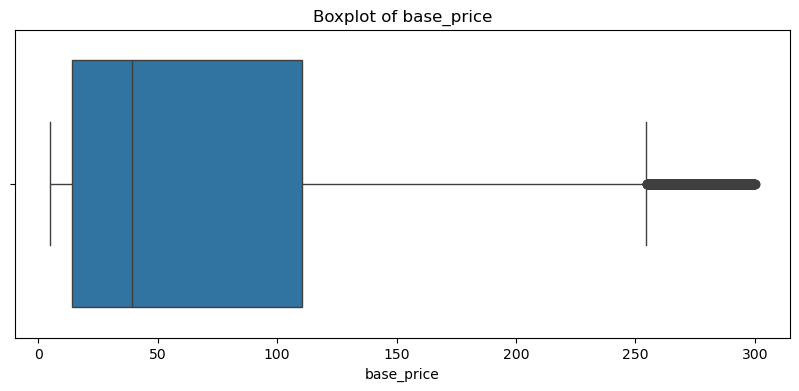

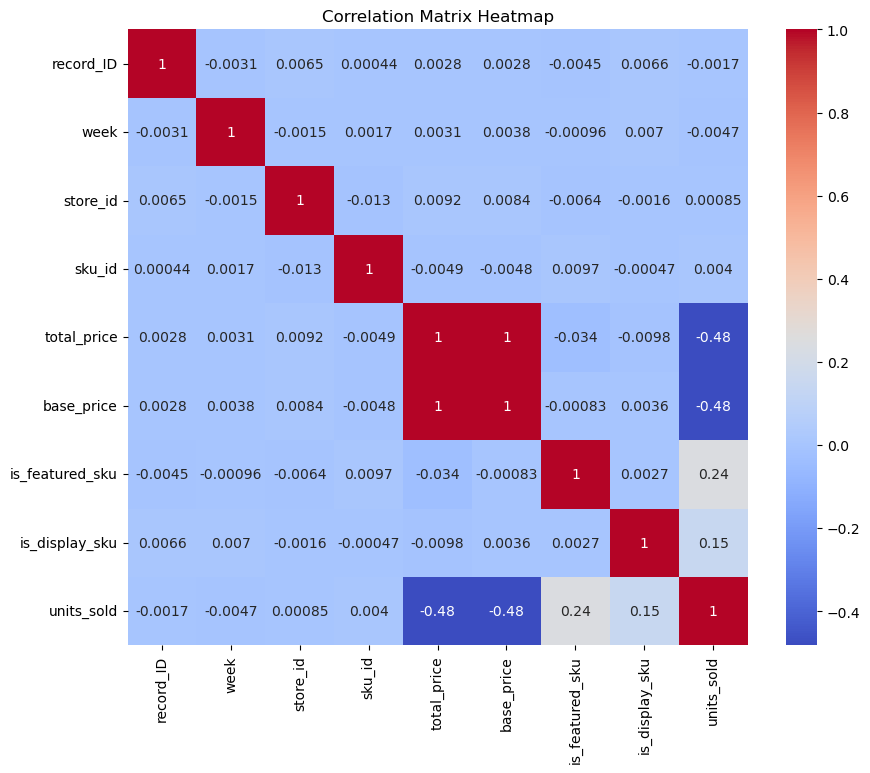

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 

categorical_clos =['store_id','sku_id','is_featured_sku','units_sold'] 

for col in categorical_clos : 
    plt.figure(figsize=(10,4)) 
    plt.hist(data[col],bins=30) 
    plt.title(f"Distribution of {col}")
    plt.show() 

#Boxplot for numerical Columns 
numerical_cols =['total_price','base_price'] 

for col in numerical_cols : 
    plt.figure(figsize=(10,4)) 
    sns.boxplot(x=data[col]) 
    plt.title(f'Boxplot of {col}') 
    plt.show() 

#check the correlation between features
correlation =data.corr() 

#Plot a headmap of correlation matrix 

plt.figure(figsize=(10,8)) 
sns.heatmap(correlation,annot=True,cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap')
plt.show()

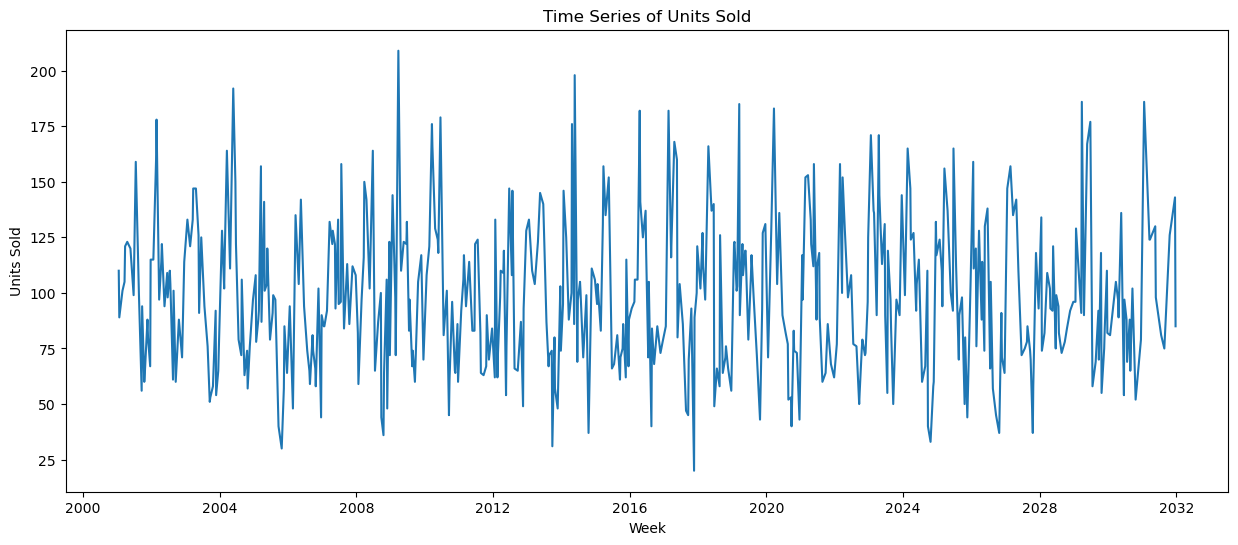

In [15]:
# plot the time series of 'units_sold' 
plt.figure(figsize=(15,6)) 
plt.plot(week_data['week'],week_data['units_sold']) 
plt.title('Time Series of Units Sold') 
plt.xlabel('Week')
plt.ylabel('Units Sold') 
plt.show()

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose 

week_data.set_index('week',inplace=True) 


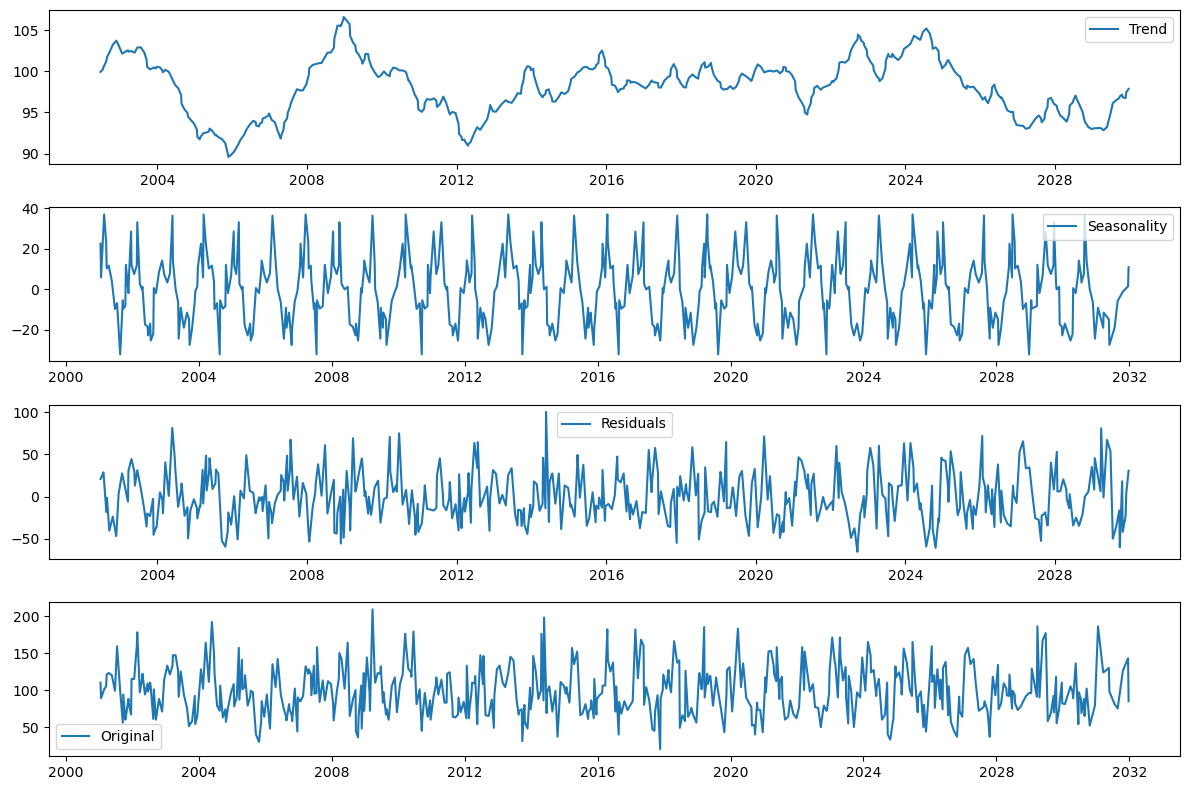

In [17]:

# Set 'week' as the index with a period of 52 weeks 
decomposition =seasonal_decompose(week_data['units_sold'],period=52) 

#Plot the trend ,Seasonality and residuals 
plt.figure(figsize=(12,8))

#Trend 
plt.subplot(411) 
plt.plot(decomposition.trend,label='Trend') 
plt.legend(loc='best') 

#Seasionlity 
plt.subplot(412)
plt.plot(decomposition.seasonal,label='Seasonality') 
plt.legend(loc='best') 

#Residuals 
plt.subplot(413) 
plt.plot(decomposition.resid,label='Residuals') 
plt.legend(loc='best') 

#Original 
plt.subplot(414) 
plt.plot(week_data['units_sold'],label='Original')  
plt.legend(loc='best') 

plt.tight_layout() 
plt.show() 